In [92]:
#Importing matplotlib and numpy to work with the image. IPython.display and scipy are also imported.
import numpy as np
from IPython.display import Image
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [74]:
from skimage import data

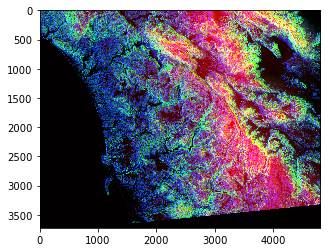

numpy.ndarray

In [94]:
#Accessing the image
photo_data = mpimg.imread("./sd-3layers.jpg")
plt.imshow(photo_data)
plt.show()
type(photo_data)

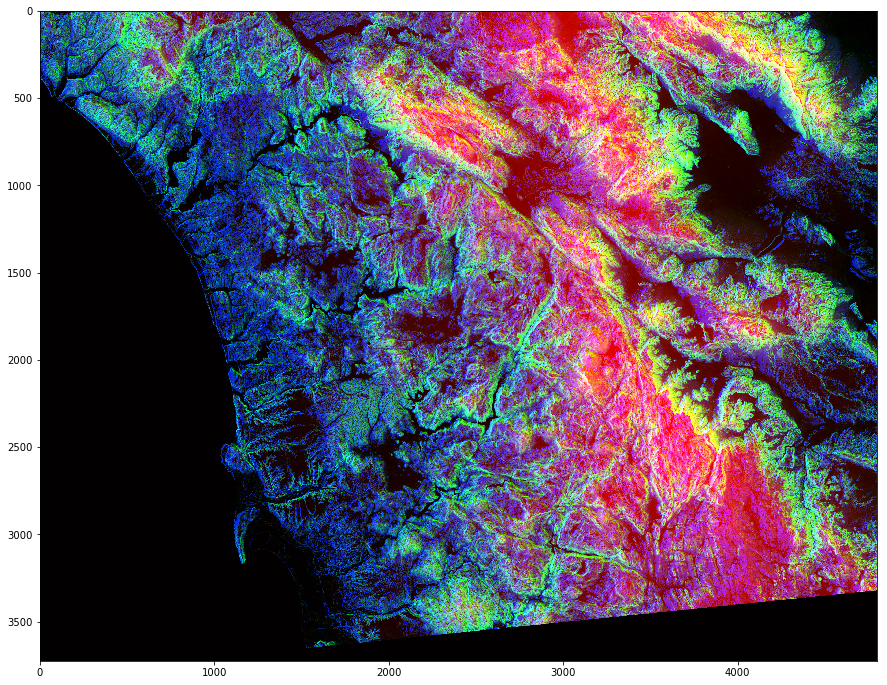

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [96]:
#Zooming the image
plt.figure(figsize=(15,15))
plt.imshow(photo_data)
plt.show()

In [85]:
#Size of the image atrix
photo_data.size

53606475

In [86]:
#RGB colour code runs from 0 to 255
photo_data.min(), photo_data.max()

(0, 255)

In [87]:
#Mean value of the RGB colour code
photo_data.mean()

75.829935450894695

In [99]:
#Using a filter to analyse the image matrix
print("shape of photo_data", photo_data.shape)
lowvaluefilter = photo_data<150
print("Shape of lowvaluefilter", lowvaluefilter.shape)

shape of photo_data (3725, 4797, 3)
Shape of lowvaluefilter (3725, 4797, 3)


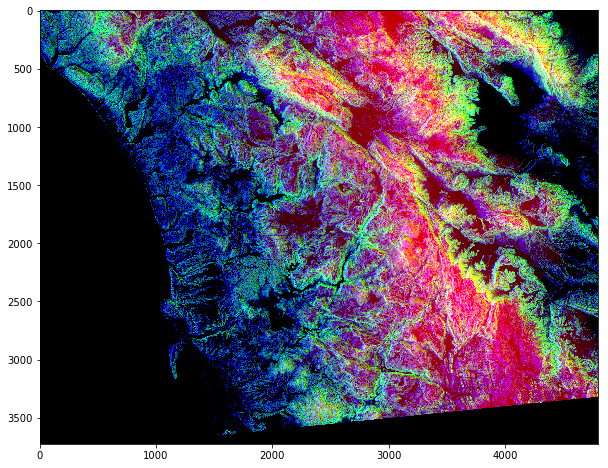

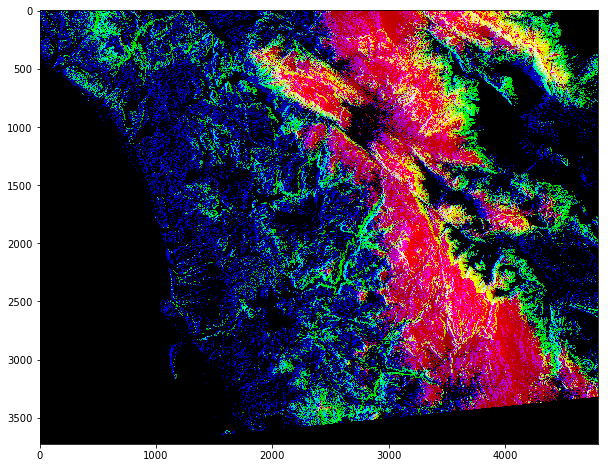

In [100]:
#Starting the tinkering of image matrix using user-defined filters
import random
plt.figure(figsize=(10,10))
plt.imshow(photo_data)
plt.show()
photo_data[lowvaluefilter] = 0
plt.figure(figsize=(10,10))
plt.imshow(photo_data)
plt.show()

In [ ]:
row_range = np.arange(len(photo_data))
col_range = row_range
print(type(row_range))

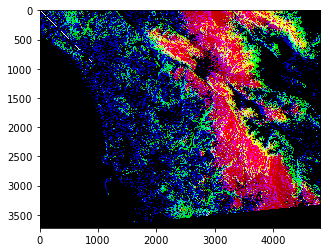

In [107]:
photo_data[row_range, col_range] = 255
plt.imshow(photo_data)
plt.show()

In [109]:
rows, cols, layers = photo_data.shape

x,y = np.ogrid[:rows, :cols]
print(x.shape, y.shape)

(3725, 1) (1, 4797)


In [110]:
centrerow, centrecol = rows/2, cols/2
dist = (x - centrerow)**2 + (y - centrecol)**2
print(dist)
radius = (rows/2)**2
print()
print(radius)

[[ 9221708.5  9216912.5  9212118.5 ...,  9207326.5  9212118.5  9216912.5]
 [ 9217984.5  9213188.5  9208394.5 ...,  9203602.5  9208394.5  9213188.5]
 [ 9214262.5  9209466.5  9204672.5 ...,  9199880.5  9204672.5  9209466.5]
 ..., 
 [ 9210542.5  9205746.5  9200952.5 ...,  9196160.5  9200952.5  9205746.5]
 [ 9214262.5  9209466.5  9204672.5 ...,  9199880.5  9204672.5  9209466.5]
 [ 9217984.5  9213188.5  9208394.5 ...,  9203602.5  9208394.5  9213188.5]]

3468906.25


In [112]:
#Making a circular mask to highlight certain portions of the image

circularmask = (dist>radius)
print(circularmask[1500:1700, 2000:2200])

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


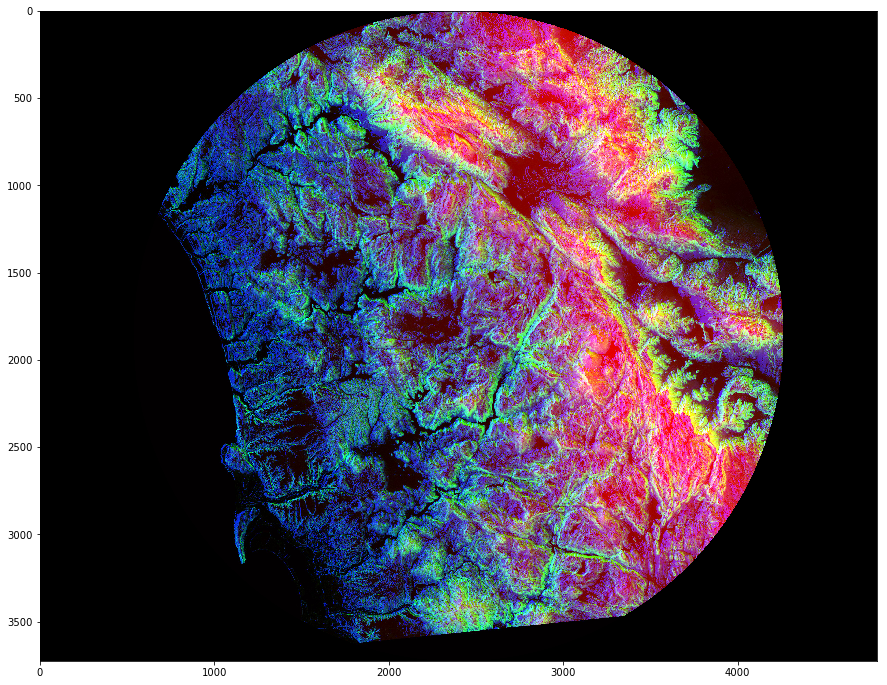

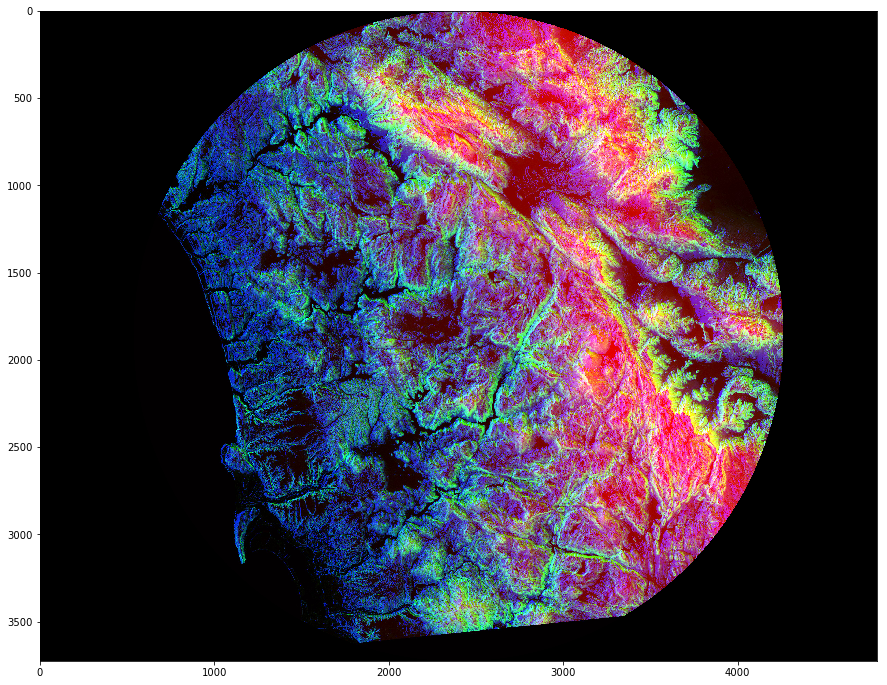

In [116]:
photo_data = misc.imread("./Week-3-Numpy/wifire/sd-3layers.jpg")
photo_data[circularmask]=0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)
plt.show()

In [117]:
halfupper = x<centrerow
halfuppermask = np.logical_and(halfupper, circularmask)

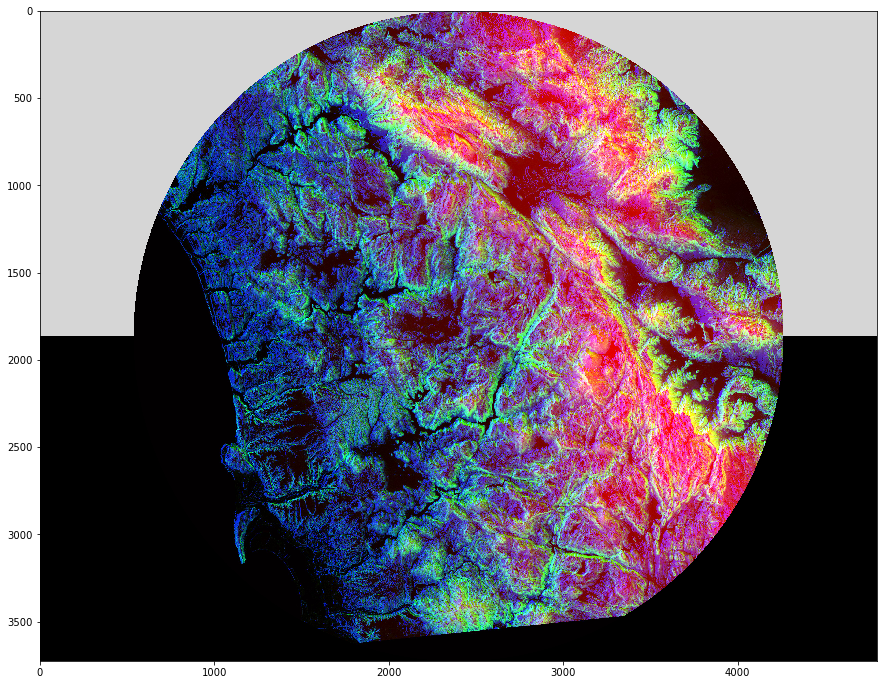

In [119]:
#Removing the top half of the image excluding the circular highlight
photo_data[halfuppermask] = random.randint(200,255)
plt.figure(figsize=(15,15))
plt.imshow(photo_data)
plt.show()

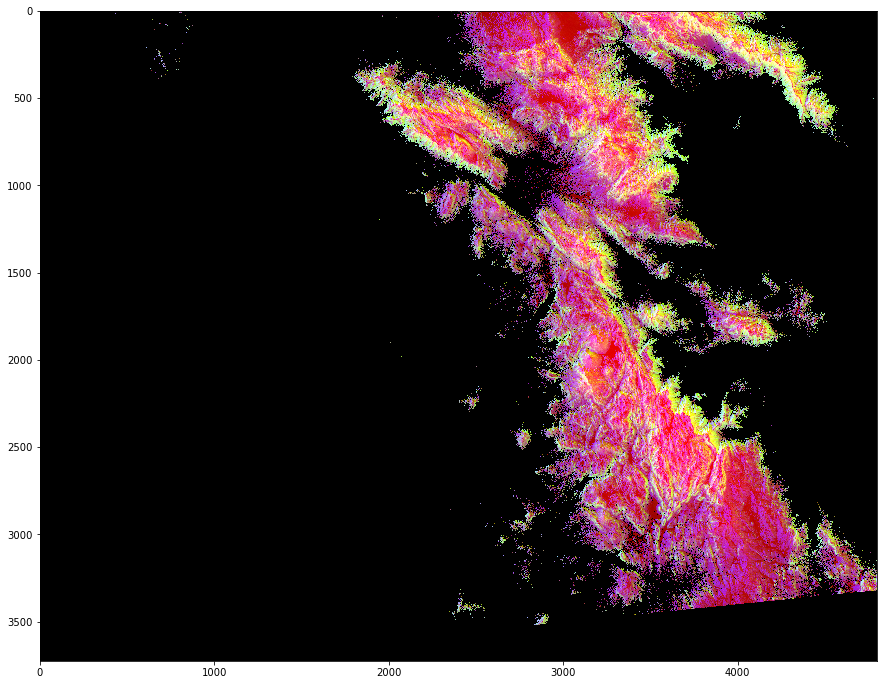

In [121]:
#Red mask to look at the red area
photo_data = misc.imread("./sd-3layers.jpg")
redmask = photo_data[:, :, 0] < 150
photo_data[redmask]=0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)
plt.show()

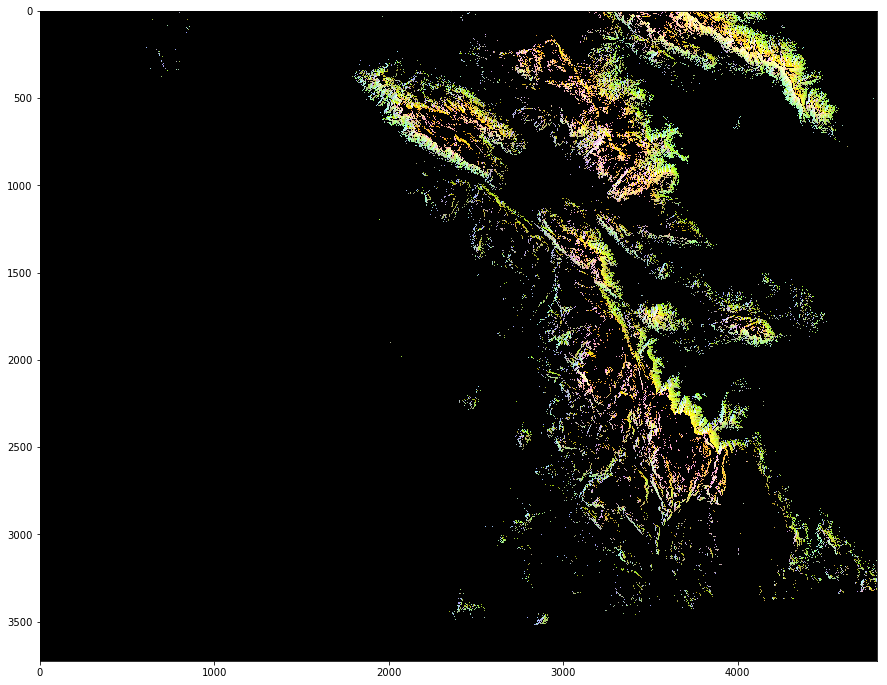

In [122]:
#Green mask to focus on the green area

greenmask = photo_data[:,:,1] <150
photo_data[greenmask]=0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)
plt.show()

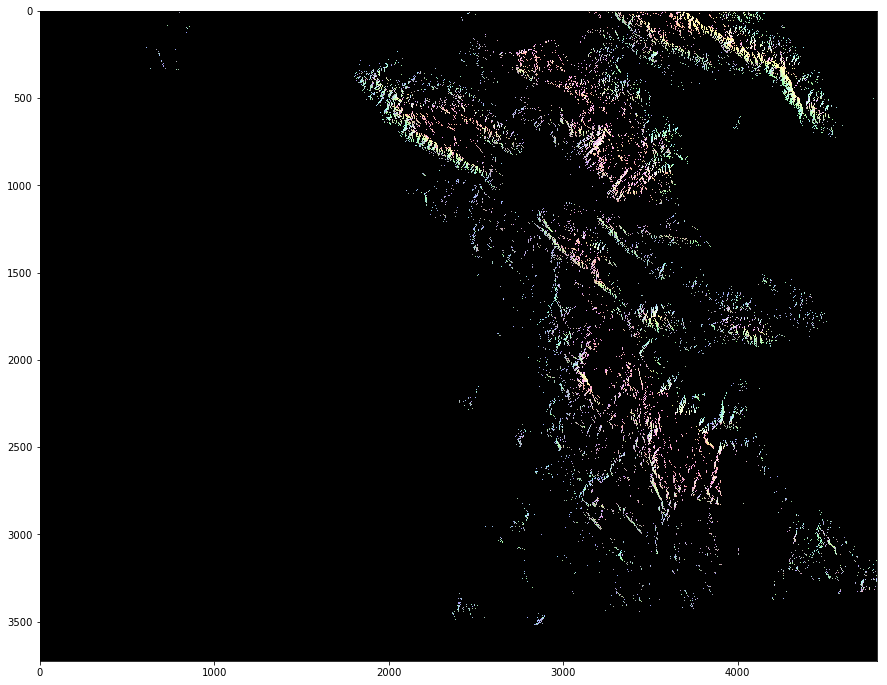

In [123]:
#blue mask to focus on the blue area

bluemask = photo_data[:, :, 2] < 150
photo_data[bluemask]=0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)
plt.show()

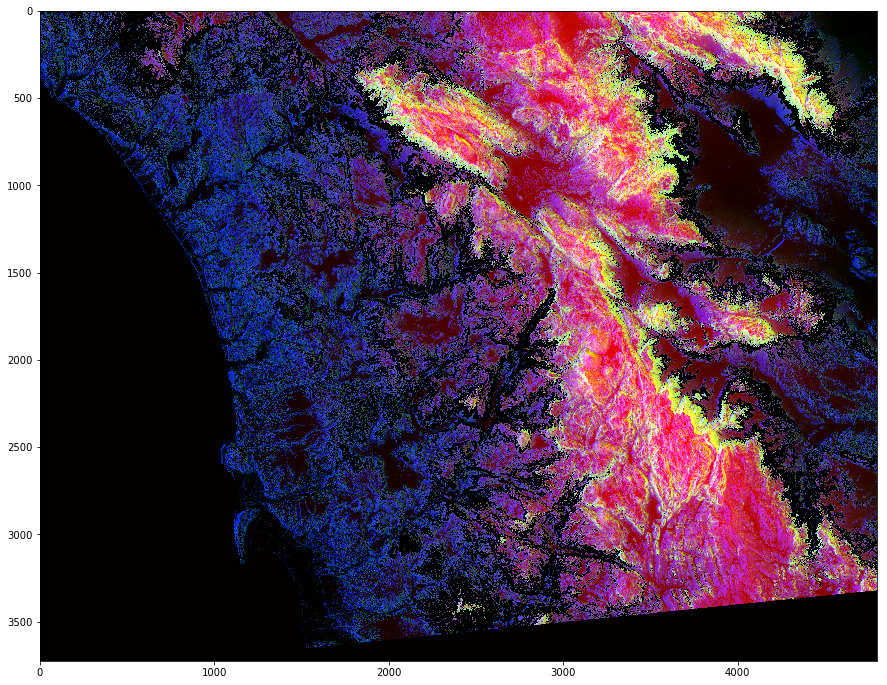

In [124]:
#A mask which is the sum of red, blue and green mask. Shows the difference between original image and the image conisitign of only RGB colours
photo_data = misc.imread("./sd-3layers.jpg")
redmask = photo_data[:, :,0] < 150
greenmask = photo_data[:, :, 1] > 100
bluemask = photo_data[:, :, 2] < 100
finalmask = np.logical_and(redmask, greenmask, bluemask)
photo_data[finalmask]=0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)
plt.show()
